In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/data/train"
valid_path = "/content/drive/MyDrive/data/test"

In [ ]:
# importing ResNet50
# input_shape=IMG_SIZE + [3] (We have 3 channel - RGB, So total size=224 X 224 X 224)
# include_top=False , Bcz we have our specified input size IMG_SIZE = [224, 224]

resnet = ResNet50(input_shape=IMG_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Excluding training of existing weights

for layers in resnet.layers:
  layers.trainable = False

In [ ]:
# Fetching number of output classes

folders = glob('/content/drive/MyDrive/data/train/*')
len(folders)

4

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x) 

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
    )

In [ ]:
# importing the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# Fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1159s 19s/step - loss: 5.1203 - accuracy: 0.3329 - val_loss: 1.2113 - val_accuracy: 0.5525
Epoch 2/20
61/61 [==============================] - 35s 574ms/step - loss: 1.1137 - accuracy: 0.5626 - val_loss: 1.0140 - val_accuracy: 0.5247
Epoch 3/20
61/61 [==============================] - 35s 566ms/step - loss: 0.9314 - accuracy: 0.6130 - val_loss: 0.7800 - val_accuracy: 0.6821
Epoch 4/20
61/61 [==============================] - 35s 566ms/step - loss: 0.8944 - accuracy: 0.6259 - val_loss: 0.8594 - val_accuracy: 0.6296
Epoch 5/20
61/61 [==============================] - 35s 566ms/step - loss: 0.8087 - accuracy: 0.6792 - val_loss: 0.9543 - val_accuracy: 0.6235
Epoch 6/20
61/61 [==============================] - 35s 569ms/step - loss: 0.9796 - accuracy: 0.6284 - val_loss: 1.2930 - val_accuracy: 0.6204
Epoch 7/20
61/61 [==============================] - 35s 568ms/step - loss: 0.9205 - accuracy: 0.6467 - val_loss: 0.6435 - val_accuracy: 0.7346

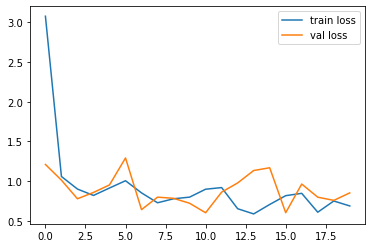

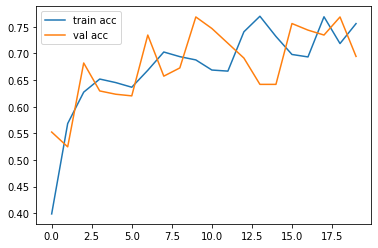

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### Saving the model

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

### Converting .h5 to TFLite model

In [ ]:
keras_model= tf.keras.models.load_model(filepath="/content/model_resnet50.h5")

tflite_converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = tflite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv5t7kzvu/assets


95571808